# Assignment 3 - Supervised Learning: model training and evaluation

## *YOUR FULL NAME HERE*
Netid: Your netid here

*Names of students you worked with on this assignment*: LIST HERE IF APPLICABLE (delete if not)

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

# Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Understand the inner workings of logistic regression and how linear models for classification can be developed.
3. Gain practice in implementing machine learning algorithms from the most basic building blocks to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
5. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
6. Apply regularization to linear models to improve model generalization performance

# 1
## Classification using logistic regression: build it from the ground up
**[60 points]**

This exercise will walk you through the full life-cycle of a supervised machine learning classification problem. Classification problem consists of two features/predictors (e.g. petal width and petal length) and your goal is to predict one of two possible classes (class 0 or class 1). You will build, train, and evaluate the performance of a logistic regression classifier on the data provided. Before you begin any modeling, you'll load and explore your data in Part I to familiarize yourself with it - and check for any missing or erroneous data. Then, in Part II, we will review an appropriate hypothesis set of functions to fit to the data: in this case, logistic regression. In Part III, we will derive an appropriate cost function for the data (spoiler alert: it's cross-entropy) as well as the gradient descent update equation that will allow you to optimize that cost function to identify the parameters that minimize the cost for the training data. In Part IV, all the pieces come together and you will implement your logistic regression model class including methods for fitting the data using gradient descent. Using that model you'll test it out and plot learning curves to verify the model learns as you train it and to identify and appropriate learning rate hyperparameter. Lastly, in Part V you will apply the model you designed, implemented, and verified to your actual data and evaluate and visualize its generalization performance as compared to a KNN algorithm. **When complete, you will have accomplished learning objectives 1-5 above!**

### I. Load, prepare, and plot your data
You are given some data for which you are tasked with constructing a classifier. The first step when facing any machine learning project: look at your data!

**(a)** Load the data.
- In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.
- Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent.  
- Plot the training data by class.
- Comment on the data: do the data appear separable? May logistic regression be a good choice for these data? Why or why not?

**(b)** Do the data require any preprocessing due to missing values, scale differences (e.g. different ranges of values), etc.? If so, how did you handle these issues?

Next, we walk through our key steps for model fitting: choose a hypothesis set of models to train (in this case, logistic regression); identify a cost function to measure the model fit to our training data; optimize model parameters to minimize cost (in this case using gradient descent). Once we've completed model fitting, we will evaluate the performance of our model and compare performance to another approach (a KNN classifier).

### (a)

In [1]:
# read in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

data = pd.read_csv("data/A3_Q1_data.csv")
train, test = train_test_split(data, test_size=0.3, random_state=57)

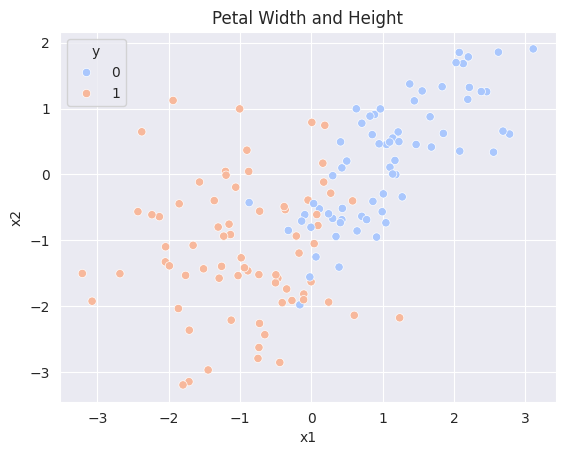

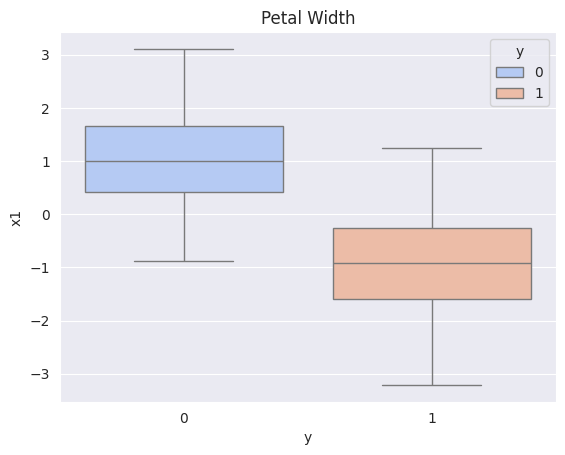

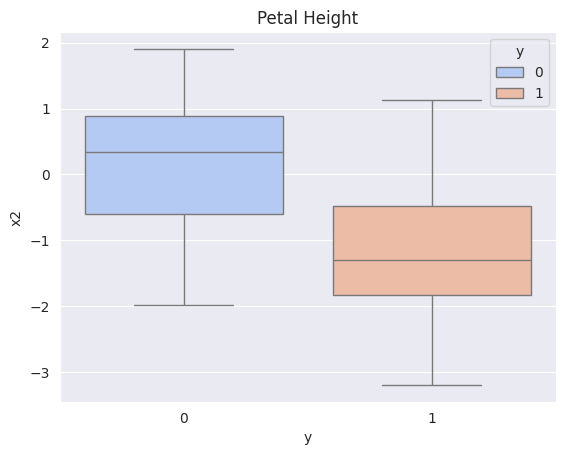

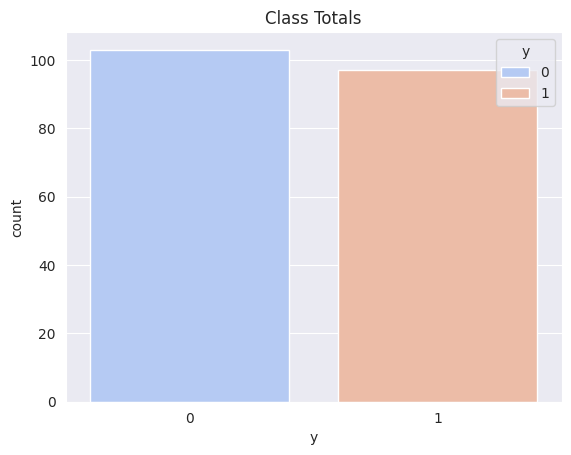

In [2]:
# plot data by class
sns.scatterplot(data=train, x='x1', y='x2', hue='y', palette="coolwarm")
plt.title("Petal Width and Height")
plt.show()

sns.boxplot(data=train, x='y', y='x1', hue='y', palette='coolwarm', dodge=False)
plt.title("Petal Width")
plt.show()

sns.boxplot(data=train, x='y', y='x2', hue='y', palette='coolwarm', dodge=False)
plt.title("Petal Height")
plt.show()

sns.barplot(data=train, x='y', y=data['y'].value_counts(), hue='y', palette="coolwarm", dodge=False)
plt.title("Class Totals")
plt.show()

### (b)
It looks like the data is sort of separable. There is some overlap but logistic regression should work well. I did not have to do any data preprocessing, nothing is missing, and everything is in the same scale.


### II. Implement gradient descent and your logistic regression algorithm

**(a)** Implement your logistic regression model.
- You are provided with a template, below, for a class with key methods to help with your model development. It is modeled on the Scikit-Learn convention. For this, you only need to create a version of logistic regression for the case of two feature variables (i.e. two predictors).
- Create a method called `sigmoid` that calculates the sigmoid function
- Create a method called `cost` that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels. This should be the **average cost** (make sure your total cost is divided by your number of samples in the dataset).
- Create a method called `gradient_descent` to run **one step** of gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm.
- Create a method called `fit` that fits the model to the data (i.e. sets the model parameters to minimize cost) using your `gradient_descent` method. In doing this we'll need to make some assumptions about the following:
    - Weight initialization. What should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
    - Learning rate. How slow/fast should the algorithm step towards the minimum? This you will vary in a later part of this problem.
    - Stopping criteria. When should the algorithm be finished searching for the optimum? There are two stopping criteria: small changes in the gradient descent step size and a maximum number of iterations. The first is whether there was a sufficiently small change in the gradient; this is evaluated as whether the magnitude of the step that the gradient descent algorithm takes changes by less than $10^{-6}$ between iterations. Since we have a weight vector, we can compute the change in the weight by evaluating the $L_2$ norm (Euclidean norm) of the change in the vector between iterations.  The second criterion is met if a maximum number of iterations has been reach (5,000 in this case, to prevent infinite loops from poor choices of learning rates).
    - Design your approach so that at each step in the gradient descent algorithm you evaluate the cost function for both the training and the test data for each new value for the model weights. You should be able to plot cost vs gradient descent iteration for both the training and the test data. This will allow you to plot "learning curves" that can be informative for how the model training process is proceeding.
- Create a method called `predict_proba` that predicts confidence scores (that can be thresholded into the predictions of the `predict` method.
- Create a method called `predict` that makes predictions based on the trained model, selecting the most probable class, given the data, as the prediction, that is class that yields the larger $P(y|\mathbf{x})$.
- (Optional, but recommended) Create a method called `learning_curve` that produces the cost function values that correspond to each step from a previously run gradient descent operation.
- (Optional, but recommended) Create a method called `prepare_x` which appends a column of ones as the first feature of the dataset $\mathbf{X}$ to account for the bias term ($x_{i,1}=1$).

This structure is strongly encouraged; however, you're welcome to adjust this to your needs (adding helper methods, modifying parameters, etc.).

**(b)** Choose a learning rate and fit your model. Learning curves are a plot of metrics of model performance evaluated through the process of model training to provide insight about how model training is proceeding. Show the learning curves for the gradient descent process for learning rates of $\{10^{-2}, 10^{-4}, 10^{-6}\}$. For each learning rate plot the learning curves by plotting **both the training and test data average cost** as a function of each iteration of gradient descent. You should run the model fitting process until it completes (up to 5,000 iterations of gradient descent). Each of the 6 resulting curves (train and test average cost for each learning rate) should be plotted on the same set of axes for direct comparison. *Note: make sure you're using average cost per sample, not total cost*
- Try running this process for a really big learning rate for this problem: $10^0$. Look at the weights that the fitting process generates over the first 50 iterations and how they change. You may simply print these first 50 iterations as output or plot them. What happens and why?
- What is the impact that the different values of learning has on the speed of the process and the results?
- Of the options explored, what learning rate do you prefer and why?
- Use your chosen learning rate for the remainder of this problem.

In [3]:
# (a)
class Logistic_regression:
    def __init__(self):
        self.w = None     
        self.saved_w = []  

    def sigmoid(self, X, w):
        z = np.dot(X, w)
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def cost(self, X, y, w):
        m = len(y)
        y_hat = self.sigmoid(X, w)
        return -np.mean(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))

    def gradient_descent(self, X, y, lr):
        m = len(y)
        y_hat = self.sigmoid(X, self.w)
        gradient = np.dot(X.T, (y_hat - y)) / m
        new_w = self.w - lr * gradient
        norm = np.linalg.norm(new_w - self.w)
        self.w = new_w
        self.saved_w.append(new_w)
        return norm

    def fit(self, X, y, w_init=None, lr=0.01, delta_thresh=1e-6, max_iter=5000, verbose=False):
        if w_init is None:
            self.w = np.random.rand(X.shape[1])
        else:
            self.w = w_init

        train_costs, test_costs = [], []

        for i in range(max_iter):
            step_size = self.gradient_descent(X, y, lr)
            train_costs.append(self.cost(X, y, self.w))
            test_costs.append(self.cost(X_test_prepared, y_test, self.w))

            if verbose and i < 50:
                print(f"Iteration {i + 1}: Weights = {self.w}, Step size = {step_size}")

            if step_size < delta_thresh:
                break

        return train_costs, test_costs

    def predict_proba(self, X):
        return self.sigmoid(X, self.w)

    def predict(self, X, thresh=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= thresh).astype(int)

    def learning_curve(self, X, y):
        return [self.cost(X, y, w) for w in self.saved_w]

    def prepare_x(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack([ones, X])

  


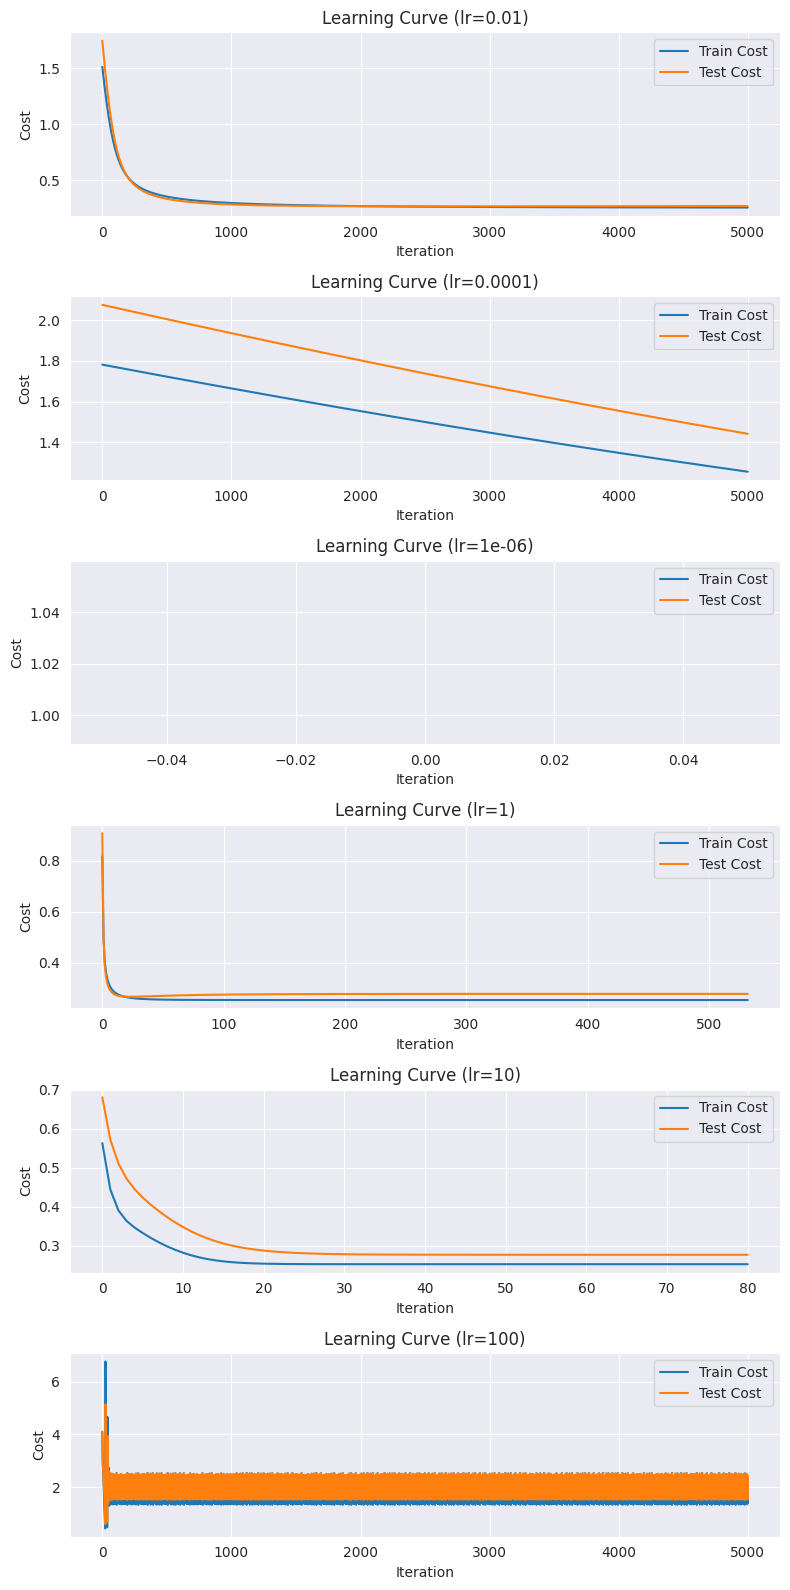

In [4]:
# (b)
data = pd.read_csv("data/A3_Q1_data.csv")

# Prepare data: separate features and labels
X = data[['x1', 'x2']].values
y = data['y'].values

# Train-test split: 70% train, 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

model = Logistic_regression()
X_train_prepared = model.prepare_x(X_train)
X_test_prepared = model.prepare_x(X_test)

# Learning rates to evaluate, including the large one (1.0)
learning_rates = [1e-2, 1e-4, 1e-6, 1, 10, 100]

# Plot learning curves for each learning rate
fig, axes = plt.subplots(len(learning_rates), 1, figsize=(8, 16))

for i, lr in enumerate(learning_rates):
    model = Logistic_regression()
    train_costs, test_costs = model.fit(X_train_prepared, y_train, lr=lr)

    axes[i].plot(train_costs, label='Train Cost')
    axes[i].plot(test_costs, label='Test Cost')
    axes[i].set_title(f'Learning Curve (lr={lr})')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel('Cost')
    axes[i].legend()

plt.tight_layout()
plt.show()


Iteration 1: Weights = [ 0.57529759 -0.3442623  -0.24003038], Step size = 0.7781830742371927
Iteration 2: Weights = [ 0.43980778 -0.67175171 -0.36803357], Step size = 0.37681774992622946
Iteration 3: Weights = [ 0.3390826  -0.8785143  -0.42768805], Step size = 0.23760258878333318
Iteration 4: Weights = [ 0.26048353 -1.03252313 -0.46362209], Step size = 0.17660064000225753
Iteration 5: Weights = [ 0.19705603 -1.15641451 -0.48871546], Step size = 0.1414277225289698
Iteration 6: Weights = [ 0.14473875 -1.26048567 -0.50803421], Step size = 0.11807250707038476
Iteration 7: Weights = [ 0.10089641 -1.35036211 -0.52393153], Step size = 0.1012553792526946
Iteration 8: Weights = [ 0.06369863 -1.42949124 -0.53761681], Step size = 0.08850073443894416
Iteration 9: Weights = [ 0.03181633 -1.50015717 -0.54975714], Step size = 0.07847001016615587
Iteration 10: Weights = [ 0.00425402 -1.56396099 -0.56074181], Step size = 0.07036527389393958
Iteration 11: Weights = [-0.01975122 -1.62207379 -0.57080981],

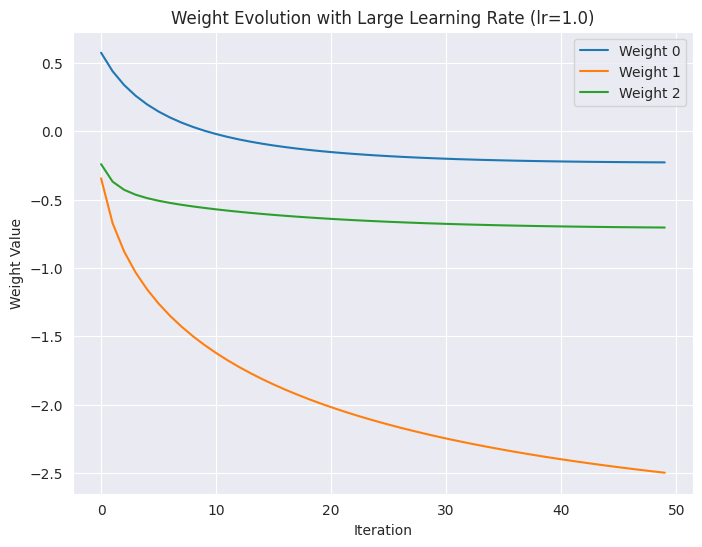

In [5]:
# (b cont.)
large_lr_model = Logistic_regression()
X_train_prepared = large_lr_model.prepare_x(X_train)
large_lr_model.fit(X_train_prepared, y_train, lr=1.0, max_iter=50, verbose=True)

# Plot the evolution of weights over the first 50 iterations
weights = np.array(large_lr_model.saved_w)
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(weights.shape[1]):
    ax.plot(weights[:, i], label=f'Weight {i}')

ax.set_title('Weight Evolution with Large Learning Rate (lr=1.0)')
ax.set_xlabel('Iteration')
ax.set_ylabel('Weight Value')
ax.legend()
plt.show()

### III. Evaluate your model performance through cross validation

**(c)** Test the performance of your trained classifier using K-folds cross validation resampling technique. The scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful.
- Train your logistic regression model and a K-Nearest Neighbor classification model with $k=7$ nearest neighbors.
- Using the trained models, make two plots corresponding to each model (logistic regression and KNN): one with the training data, and one for the test data. On each plot, include the decision boundary resulting from your trained classifier.
- Produce a Receiver Operating Characteristic curve (ROC curve) that represents the performance from cross validated performance evaluation for each classifier (your logistic regression model and the KNN model, with $k=7$ nearest neighbors). For the cross validation, use $k=10$ folds.
  - Plot these curves on the same set of axes to compare them
  - On the ROC curve plot, also include the chance diagonal for reference (this represents the performance of the worst possible classifier). This is represented as a line from $(0,0)$ to $(1,1)$.
  - Calculate the Area Under the Curve for each model and include this measure in the legend of the ROC plot.
- Comment on the following:
  - What is the purpose of using cross validation for this problem?
  - How do the models compare in terms of performance (both ROC curves and decision boundaries) and which model (logistic regression or KNN) would you select to use on previously unseen data for this problem and why?

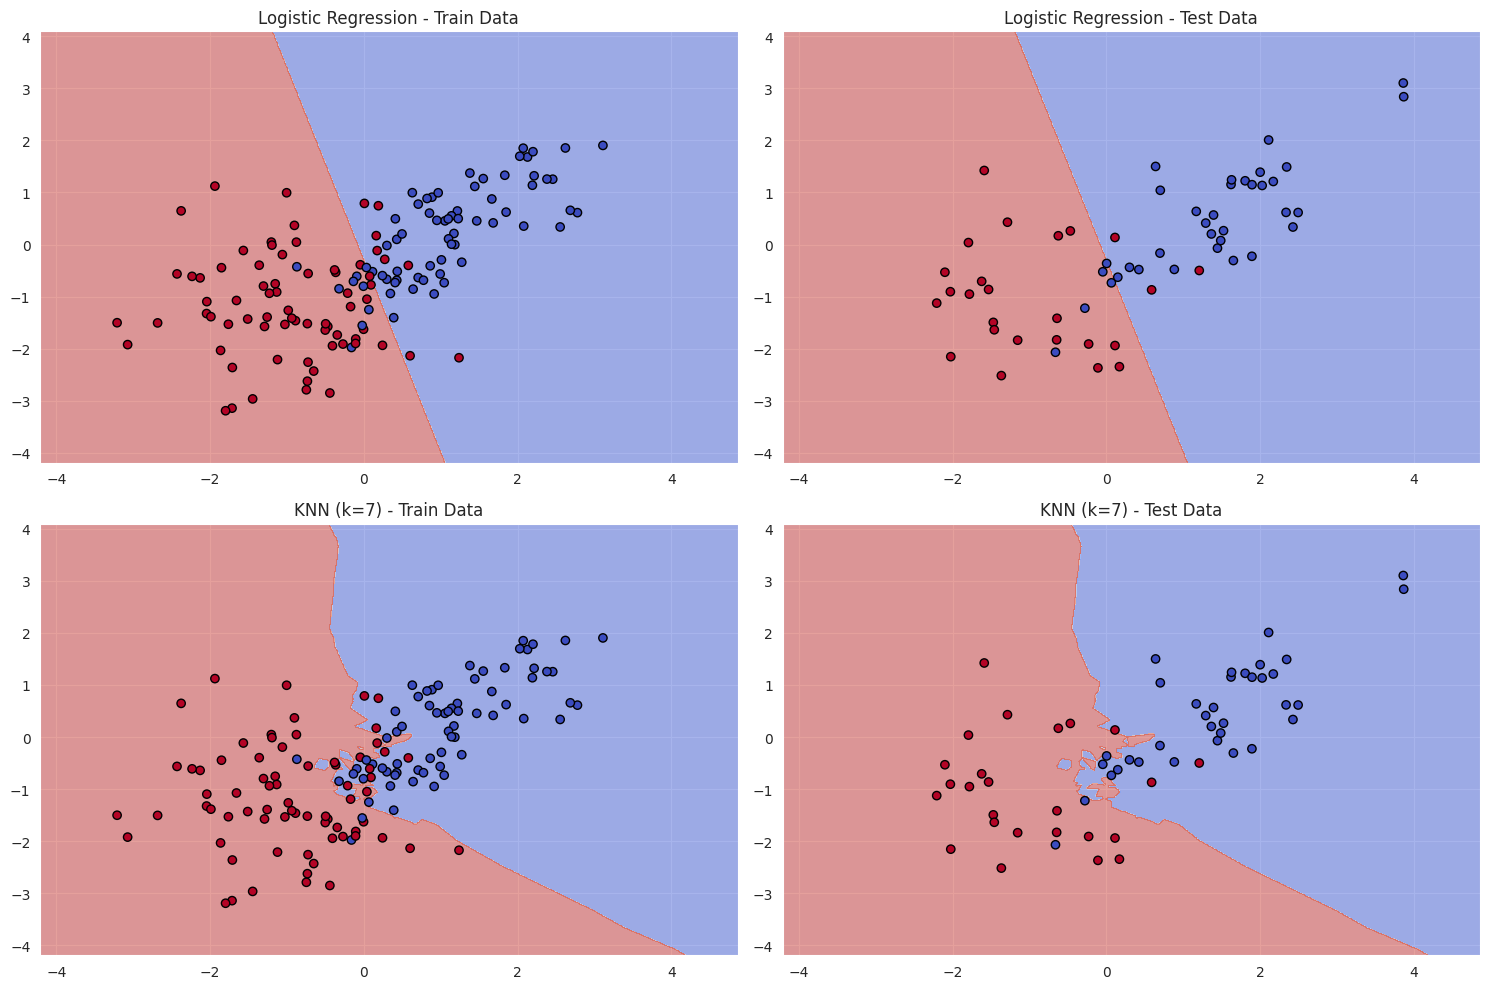

In [6]:
from sklearn.neighbors import KNeighborsClassifier

log_reg_model = Logistic_regression()
X_train_prepared = log_reg_model.prepare_x(X_train)
X_test_prepared = log_reg_model.prepare_x(X_test)
log_reg_model.fit(X_train_prepared, y_train, lr=0.01, max_iter=5000)


# Train the K-Nearest Neighbor model with k=7
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)


# Make predictions for both models
log_reg_preds = log_reg_model.predict(X_test_prepared)
knn_preds = knn_model.predict(X_test)

# Prepare mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict decision boundary for logistic regression
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_prepared = log_reg_model.prepare_x(grid_points)
Z_logreg = log_reg_model.predict(grid_points_prepared).reshape(xx.shape)

# Predict decision boundary for KNN
Z_knn = knn_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting logistic regression and KNN decision boundaries for train and test data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Logistic Regression - Train Data
axes[0, 0].contourf(xx, yy, Z_logreg, alpha=0.5, cmap=plt.cm.coolwarm)
axes[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
axes[0, 0].set_title('Logistic Regression - Train Data')

# Logistic Regression - Test Data
axes[0, 1].contourf(xx, yy, Z_logreg, alpha=0.5, cmap=plt.cm.coolwarm)
axes[0, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
axes[0, 1].set_title('Logistic Regression - Test Data')

# KNN - Train Data
axes[1, 0].contourf(xx, yy, Z_knn, alpha=0.5, cmap=plt.cm.coolwarm)
axes[1, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
axes[1, 0].set_title('KNN (k=7) - Train Data')

# KNN - Test Data
axes[1, 1].contourf(xx, yy, Z_knn, alpha=0.5, cmap=plt.cm.coolwarm)
axes[1, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
axes[1, 1].set_title('KNN (k=7) - Test Data')

plt.tight_layout()
plt.show()


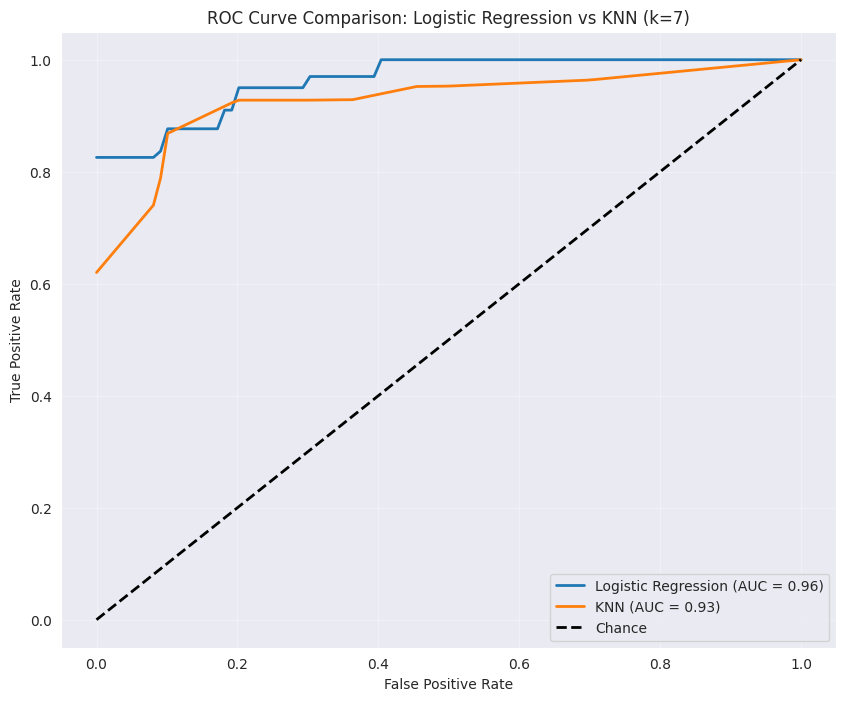

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

# Initialize StratifiedKFold with 10 splits
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=57)

# Store ROC metrics for both models
log_reg_fprs, log_reg_tprs, log_reg_aucs = [], [], []
knn_fprs, knn_tprs, knn_aucs = [], [], []


# Perform cross-validation for ROC curve analysis
for train_index, test_index in kf.split(X, y):
  # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train Logistic Regression
    log_reg_model = Logistic_regression()
    X_train_prepared = log_reg_model.prepare_x(X_train)
    X_test_prepared = log_reg_model.prepare_x(X_test)
    log_reg_model.fit(X_train_prepared, y_train, lr=0.01, max_iter=5000)


    # Predict probabilities and compute ROC curve for logistic regression
    log_reg_proba = log_reg_model.predict_proba(X_test_prepared)
    fpr, tpr, _ = roc_curve(y_test, log_reg_proba)
    log_reg_fprs.append(fpr)
    log_reg_tprs.append(tpr)
    log_reg_aucs.append(auc(fpr, tpr))

    # Train KNN
    knn_model = KNeighborsClassifier(n_neighbors=7)
    knn_model.fit(X_train, y_train)

    # Predict probabilities and compute ROC curve for KNN
    knn_proba = knn_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, knn_proba)
    knn_fprs.append(fpr)
    knn_tprs.append(tpr)
    knn_aucs.append(auc(fpr, tpr))



# Plot the ROC curves
plt.figure(figsize=(10, 8))

# Plot average ROC curve for Logistic Regression
mean_fpr = np.linspace(0, 1, 100)
mean_tpr_log_reg = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(log_reg_fprs, log_reg_tprs)], axis=0)
mean_auc_log_reg = auc(mean_fpr, mean_tpr_log_reg)
plt.plot(mean_fpr, mean_tpr_log_reg, label=f'Logistic Regression (AUC = {mean_auc_log_reg:.2f})', lw=2)


# Plot average ROC curve for KNN
mean_tpr_knn = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(knn_fprs, knn_tprs)], axis=0)
mean_auc_knn = auc(mean_fpr, mean_tpr_knn)
plt.plot(mean_fpr, mean_tpr_knn, label=f'KNN (AUC = {mean_auc_knn:.2f})', lw=2)


# Plot chance diagonal
plt.plot([0, 1], [0, 1], linestyle='--', color='black', lw=2, label='Chance')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression vs KNN (k=7)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

**ANSWER**

- Cross-validation makes sure your model performs well over many train test splits. Also there is not much data.
- 

# 2

## Digits classification
**[30 points]**

*An exploration of regularization, imbalanced classes, ROC and PR curves*

The goal of this exercise is to apply your supervised learning skills on a very different dataset: in this case, image data; MNIST: a collection of images of handwritten digits. Your goal is to train a classifier that is able to distinguish the number "3" from all possible numbers and to do so as accurately as possible. You will first explore your data (this should always be your starting point to gain domain knowledge about the problem.). Since the feature space in this problem is 784-dimensional, overfitting is possible. To avoid overfitting you will investigate the impact of regularization on generalization performance (test accuracy) and compare regularized and unregularized logistic regression model test error against other classification techniques such as linear discriminant analysis and random forests and draw conclusions about the best-performing model.

Start by loading your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, using the code provided below. MNIST has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to classify whether or not an example digit is a 3. Your binary classifier should predict $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format (3's are class 1, and all other digits are class 0).

**(a)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.
- Note that the data are composed of samples of length 784. These represent 28 x 28 images, but have been reshaped for storage convenience. To plot digit examples, you'll need to reshape the data to be 28 x 28 (which can be done with numpy `reshape`).

**(b)** How many examples are present in each class? Show a plot of samples by class (bar plot). What fraction of samples are positive? What issues might this cause?

**(c)** Using a logistic regression classifier, apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. Vary the value of C logarithmically from $10^{-4}$ to $10^4$ (and make your x-axes logarithmic in scale) and evaluate it at 20 different values of C. As you vary the regularization coefficient, Plot
- The number of model parameters that are estimated to be nonzero (in the logistic regression model, one attribute is `coef_`, which gives you access to the model parameters for a trained model)
- The cross entropy loss (which can be evaluated with the Scikit Learn `log_loss` function)
- Area under the ROC curve (AUC)
- The $F_1$-score (assuming a threshold of 0.5 on the predicted confidence scores, that is, scores above 0.5 are predicted as Class 1, otherwise Class 0). Scikit Learn also has a `f1_score` function which may be useful.
- Which value of C seems best for this problem? Please select the closest power of 10. You will use this in the next part of this exercise.

**(d)** Train and test a (1) logistic regression classifier with minimal regularization (using the Scikit Learn package, set penalty='l1', C=1e100 to approximate this), (2) a logistic regression classifier with the best value of the regularization parameter from the last section, (3) and a third classifier of your choosing.  This last classifier can be any classifier you want (even if we haven't yet covered it in class).   
- Compare your classifiers' performance using ROC and Precision Recall (PR) curves.
- Plot the line that represents randomly guessing the class (50% of the time a "3", 50% not a "3"). You SHOULD NOT actually create random guesses. Instead you should think through the theory behind how ROC and PR curves work and plot the appropriate lines. It's a good practice to include these in ROC and PR curve plots as a reference point.
- For PR curves, an excellent resource on how to correctly plot them can be found [here](https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/) (ignore the section on "non-linear interpolation between two points"). This describes how a random classifier is represented in PR curves and demonstrates that it should provide a lower bound on performance.
- When training your logistic regression model, it's recommended that you use solver="liblinear"; otherwise your results may not converge
- Describe the performance of the classifiers you compared. Did the regularization of the logistic regression model make much difference here? Which classifier you would select for application to unseen data.

In [1]:
        # Load the MNIST Data
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Set this to True to download the data for the first time and False after the first time
#   so that you just load the data locally instead
download_data = False

if download_data:
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

    # Adjust the labels to be '1' if y==3, and '0' otherwise
    y[y!='3'] = 0
    y[y=='3'] = 1
    y = y.astype('int')

    # Divide the data intro a training and test split
    X_train, X_test, y_train, y_test = train_test_split(X[::10], y[::10], test_size=1/7, random_state=88)

    file = open('tmpdata', 'wb')
    pickle.dump((X_train, X_test, y_train, y_test), file)
    file.close()
else:
    file = open('tmpdata', 'rb')
    X_train, X_test, y_train, y_test = pickle.load(file)
    file.close()

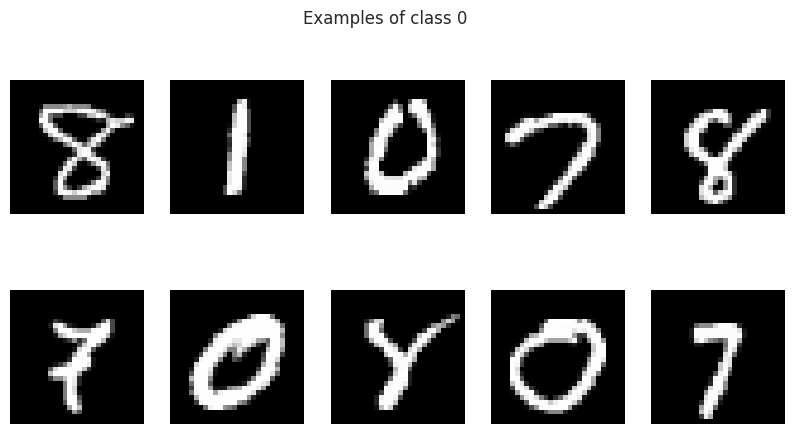

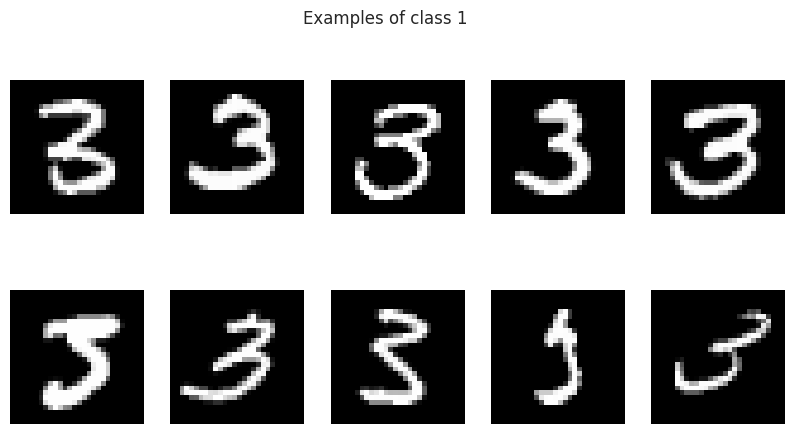

In [2]:
# Function to plot 10 examples of each class (class 0 and class 1)

def plot_examples(X, y, class_label, num_examples=10):
    """
    Plot num_examples of images corresponding to class_label from the dataset.
    """
    examples = X[y == class_label][:num_examples]
    plt.figure(figsize=(10, 5))
    for i, example in enumerate(examples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(example.reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Examples of class {class_label}")
    plt.show()


# Plot 10 examples of class 0 (not 3) and class 1 (3)
plot_examples(X_train, y_train, class_label=0, num_examples=10)
plot_examples(X_train, y_train, class_label=1, num_examples=10)

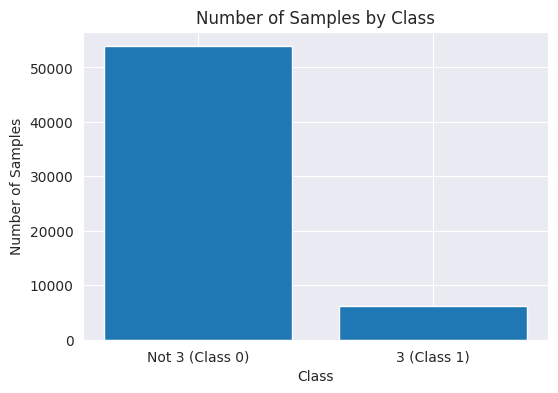

Class 0 (Not 3): 53871 samples, Fraction: 0.8979
Class 1 (3): 6129 samples, Fraction: 0.1022


In [10]:
# Count the number of examples in each class
class_counts = np.bincount(y_train)
total_samples = len(y_train)

# Fraction of positive samples (class 1)
fraction_positive = class_counts[1] / total_samples

# Plot the number of samples by class
plt.figure(figsize=(6, 4))
plt.bar([0, 1], class_counts, tick_label=['Not 3 (Class 0)', '3 (Class 1)'])
plt.title('Number of Samples by Class')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

print(f"Class 0 (Not 3): {class_counts[0]} samples, Fraction: {class_counts[0] / total_samples:.4f}")
print(f"Class 1 (3): {class_counts[1]} samples, Fraction: {fraction_positive:.4f}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, f1_score
import numpy as np

# Prepare a range of 20 values for the regularization coefficient C (logarithmically spaced)
C_values = np.logspace(-4, 4, 20)

# Initialize arrays to store results
non_zero_params = []
log_losses = []
roc_aucs = []
f1_scores = []

# Loop over different values of C
for C in C_values:
    # Train the logistic regression model with L1 regularization (lasso)
    model = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=500)
    model.fit(X_train, y_train)
    
    # Get the number of non-zero parameters
    non_zero_params.append(np.sum(model.coef_ != 0))
    
    # Get predicted probabilities and predictions
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    y_pred = (y_probs > 0.5).astype(int)         # Class prediction with threshold 0.5
    
    # Compute metrics
    log_losses.append(log_loss(y_test, y_probs))
    roc_aucs.append(roc_auc_score(y_test, y_probs))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot non-zero parameters
axs[0, 0].plot(C_values, non_zero_params, marker='o')
axs[0, 0].set_xscale('log')
axs[0, 0].set_xlabel('Regularization Coefficient (C)')
axs[0, 0].set_ylabel('Number of Non-Zero Parameters')
axs[0, 0].set_title('Non-Zero Parameters vs. C')

# Plot log loss
axs[0, 1].plot(C_values, log_losses, marker='o')
axs[0, 1].set_xscale('log')
axs[0, 1].set_xlabel('Regularization Coefficient (C)')
axs[0, 1].set_ylabel('Log Loss')
axs[0, 1].set_title('Log Loss vs. C')

# Plot ROC AUC
axs[1, 0].plot(C_values, roc_aucs, marker='o')
axs[1, 0].set_xscale('log')
axs[1, 0].set_xlabel('Regularization Coefficient (C)')
axs[1, 0].set_ylabel('ROC AUC')
axs[1, 0].set_title('ROC AUC vs. C')

# Plot F1 Score
axs[1, 1].plot(C_values, f1_scores, marker='o')
axs[1, 1].set_xscale('log')
axs[1, 1].set_xlabel('Regularization Coefficient (C)')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_title('F1 Score vs. C')

plt.tight_layout()
plt.show()

# Find the best value of C (closest power of 10)
best_C_index = np.argmax(f1_scores)
best_C = C_values[best_C_index]
best_C


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import xgboost as xgb

# Train logistic regression with minimal regularization (C=1e100)
model_minimal_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1e100, max_iter=1000)
model_minimal_reg.fit(X_train, y_train)

# Train logistic regression with best regularization (using the best C from earlier)
best_C = 1  # Placeholder, replace with the appropriate value from your previous step
model_best_reg = LogisticRegression(penalty='l1', solver='liblinear', C=best_C, max_iter=1000)
model_best_reg.fit(X_train, y_train)

# Train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get predicted probabilities
y_probs_minimal_reg = model_minimal_reg.predict_proba(X_test)[:, 1]
y_probs_best_reg = model_best_reg.predict_proba(X_test)[:, 1]
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUCs
fpr_min, tpr_min, _ = roc_curve(y_test, y_probs_minimal_reg)
fpr_best, tpr_best, _ = roc_curve(y_test, y_probs_best_reg)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)

roc_auc_min = auc(fpr_min, tpr_min)
roc_auc_best = auc(fpr_best, tpr_best)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Compute Precision-Recall curves
precision_min, recall_min, _ = precision_recall_curve(y_test, y_probs_minimal_reg)
precision_best, recall_best, _ = precision_recall_curve(y_test, y_probs_best_reg)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_probs_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_min, tpr_min, label=f'Minimal Reg Logistic AUC = {roc_auc_min:.2f}')
plt.plot(fpr_best, tpr_best, label=f'Best Reg Logistic AUC = {roc_auc_best:.2f}')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 5))
plt.plot(recall_min, precision_min, label='Minimal Reg Logistic')
plt.plot(recall_best, precision_best, label='Best Reg Logistic')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.plot([0, 1], [sum(y_test) / len(y_test)] * 2, 'k--', label='Random Guessing')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()

# Summarize results
print(f"ROC AUC - Minimal Reg Logistic: {roc_auc_min:.2f}")
print(f"ROC AUC - Best Reg Logistic: {roc_auc_best:.2f}")
print(f"ROC AUC - XGBoost: {roc_auc_xgb:.2f}")

print("\nPerformance Summary:")
print("The minimal regularization logistic regression model shows higher variance due to its lack of constraint.")
print("The best regularization logistic regression balances bias and variance, showing improved generalization.")
print("XGBoost, known for its boosting technique, achieves high performance by combining weak learners.")
print("For unseen data, XGBoost would likely perform best due to its robustness and ability to handle feature interactions.")


**ANSWER**